# Building Complex Models Using the Functional API

One example of a nonsequential neural network is a Wide and Deep neural networks. It connects all or part of the inputs directly to the output layers. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transformations

![alt text](https://1.bp.blogspot.com/-Dw1mB9am1l8/V3MgtOzp3uI/AAAAAAAABGs/mP-3nZQCjWwdk6qCa5WraSpK8A7rSPj3ACLcB/s1600/image04.png "Title")


Building wide and deep models to tackle California Housing Problem

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [38]:
# loading and splitting the dataset into train, valid and test set
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [40]:
# buidling the model using Functional API
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

![alt text](Images/model_wide.png "Title")


- First, we need to create an Input object. This is a specification of the kind of input the model will get, including its shape and dtype. A model may actually have multiple inputs, as we will see shortly. 
- Next, we create a Dense layer with 30 neurons, using the ReLU activation function. As soon as it is created, notice that we call it like a function, passing it the input. This is why this is called the Functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet. 
- We then create a second hidden layer, and again we use it as a function. Note that we pass it the output of the first hidden layer.
- Next, we create a Concatenate layer, and once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer. You may prefer the keras.layers.concatenate() function, which creates a Concatenate layer and immediately calls it with the given inputs. - Then we create the output layer, with a single neuron and no activation function, and we call it like a function, passing it the result of the concatenation. 
- Lastly, we create a Keras Model, specifying which inputs and outputs to use.

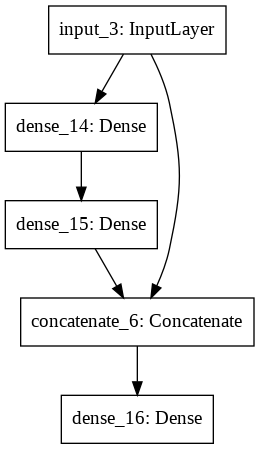

In [41]:
keras.utils.plot_model(model)

In [42]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 2.6692 - val_loss: 0.8889
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7477 - val_loss: 0.7631
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7124 - val_loss: 0.7556
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6548 - val_loss: 0.6802
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6378 - val_loss: 0.6691
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5879 - val_loss: 0.6166
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5750 - val_loss: 0.6137
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5479 - val_loss: 0.5738
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5433 - val_loss: 0.5990
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5252 - val_loss: 0.5551

What if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path. In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7):

![alt text](Images/model-wide-2.png)

In [43]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, input_B])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [44]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [45]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [46]:
history = model.fit((X_train_A,X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.5548 - val_loss: 1.9109
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3083 - val_loss: 1.0273
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8442 - val_loss: 0.8038
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7232 - val_loss: 0.7325
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6804 - val_loss: 0.7013
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6581 - val_loss: 0.6804
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6424 - val_loss: 0.6636
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6294 - val_loss: 0.6499
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6184 - val_loss: 0.6377
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6095 - val_loss: 0.6296

In [47]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.5733


In [48]:
y_pred = model.predict((X_new_A, X_new_B))
y_pred

array([[2.4633472],
       [2.310905 ],
       [2.1817818]], dtype=float32)

### Multiple Outputs

- The task may demand it. For instance, you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task. 
- Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not. 
- Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

[![image](https://www.linkpicture.com/q/multi-output.png)](https://www.linkpicture.com/view.php?img=LPic5fd4d7f478ab6162750591)

In [54]:
# adding one extra output

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

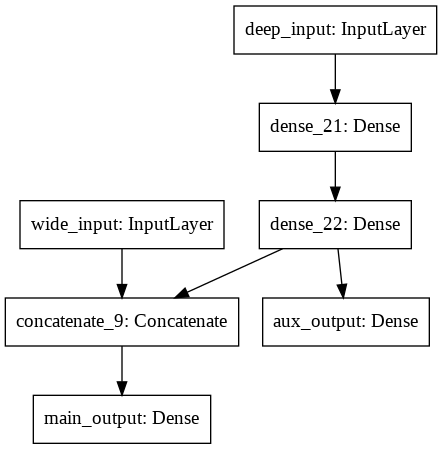

In [55]:
keras.utils.plot_model(model)

Each output need its own loss function. Therefore, we need to pass list of losses (in order) or you can pass dictionary that maps each output name to the corresponding loss

Keras will add all the losses to get the final loss used for training. We care much about the main output as the auxiliary output is just for regularization purpose, so we assign more weight to the main output loss

In [56]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [57]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 0.9969 - main_output_loss: 0.9175 - aux_output_loss: 1.7115 - val_loss: 0.6024 - val_main_output_loss: 0.5618 - val_aux_output_loss: 0.9674
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5688 - main_output_loss: 0.5360 - aux_output_loss: 0.8636 - val_loss: 0.5316 - val_main_output_loss: 0.4948 - val_aux_output_loss: 0.8623
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5245 - main_output_loss: 0.4980 - aux_output_loss: 0.7627 - val_loss: 0.5857 - val_main_output_loss: 0.5585 - val_aux_output_loss: 0.8312
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4862 - main_output_loss: 0.4634 - aux_output_loss: 0.6915 - val_loss: 0.6176 - val_main_output_loss: 0.5887 - val_aux_output_loss: 0.8777
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4612 - main_output_loss: 0.4394 - aux_output_loss: 0.6581 - val_loss

When we evaluate Keras will return the total loss, as well as individual losses

In [58]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.4042 - main_output_loss: 0.3923 - aux_output_loss: 0.5108
